# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# counters
city_counter = 1

# lists
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:
        
    # query url
    query_url = base_url + "&q=" + city
    
    # json respose
    response = requests.get(query_url).json()
    
    print(f"Processing Record {city_counter}: {city}")
    city_counter += 1
    
   # try to append to lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("Record not found")
       
print("Finished")

Processing Record 1: monrovia
Processing Record 2: bluff
Processing Record 3: xuddur
Processing Record 4: ushuaia
Processing Record 5: bathsheba
Processing Record 6: hermanus
Processing Record 7: vaini
Processing Record 8: ponta do sol
Processing Record 9: paamiut
Processing Record 10: provideniya
Processing Record 11: mount isa
Processing Record 12: cherskiy
Processing Record 13: port elizabeth
Processing Record 14: tsihombe
Record not found
Processing Record 15: ilulissat
Processing Record 16: ormara
Processing Record 17: new norfolk
Processing Record 18: roma
Processing Record 19: san patricio
Processing Record 20: hami
Processing Record 21: venezuela
Processing Record 22: nchelenge
Processing Record 23: punta arenas
Processing Record 24: albany
Processing Record 25: aksay
Processing Record 26: kodiak
Processing Record 27: thompson
Processing Record 28: airai
Processing Record 29: carnarvon
Processing Record 30: svetlogorsk
Processing Record 31: ishinomaki
Processing Record 32: hilo

Processing Record 246: businga
Processing Record 247: flinders
Processing Record 248: yashkino
Processing Record 249: wilmington
Processing Record 250: narsaq
Processing Record 251: faya
Processing Record 252: otjiwarongo
Processing Record 253: nouna
Processing Record 254: baghdad
Processing Record 255: khatanga
Processing Record 256: jaciara
Processing Record 257: sao joao da barra
Processing Record 258: constitucion
Processing Record 259: union city
Processing Record 260: adre
Processing Record 261: caravelas
Processing Record 262: umm kaddadah
Processing Record 263: saint-augustin
Processing Record 264: formoso do araguaia
Record not found
Processing Record 265: loreto
Processing Record 266: waingapu
Processing Record 267: wajir
Processing Record 268: anapolis
Processing Record 269: kangaatsiaq
Processing Record 270: tanabe
Processing Record 271: tumannyy
Record not found
Processing Record 272: goma
Processing Record 273: padang
Processing Record 274: coueron
Processing Record 275: 

Processing Record 489: fukue
Processing Record 490: jining
Processing Record 491: hailar
Processing Record 492: kyaikkami
Processing Record 493: eureka
Processing Record 494: high level
Processing Record 495: usogorsk
Processing Record 496: teguise
Processing Record 497: steinbach
Processing Record 498: grand gaube
Processing Record 499: kenora
Processing Record 500: nizhniy odes
Processing Record 501: los llanos de aridane
Processing Record 502: ust-kuyga
Processing Record 503: sinnamary
Processing Record 504: buala
Processing Record 505: nanganga
Processing Record 506: alofi
Processing Record 507: zhigalovo
Processing Record 508: guerrero negro
Processing Record 509: fortuna
Processing Record 510: vallenar
Processing Record 511: pierre
Processing Record 512: kutum
Processing Record 513: patos
Processing Record 514: tabuk
Processing Record 515: alugan
Processing Record 516: tromso
Processing Record 517: bukama
Processing Record 518: yermakovskoye
Processing Record 519: naze
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = {"City": cities_list,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../output_data/cities.csv")

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Monrovia,80,LR,1595793344,78,6.30,-10.80,76.66,12.50
1,Bluff,0,NZ,1595792824,85,-46.60,168.33,42.24,11.50
2,Oddur,18,SO,1595793344,73,4.12,43.89,73.96,12.06
3,Ushuaia,40,AR,1595793009,90,-54.80,-68.30,33.80,20.80
4,Bathsheba,59,BB,1595793094,77,13.22,-59.52,83.12,17.09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

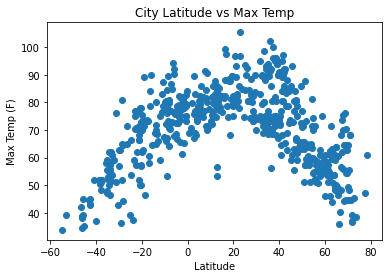

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Max Temp 7/26/2020")
plt.savefig("../output_data/Fig1.png")
plt.show()
# code is comparing each individual cities latitude to the max temp for the day
# there does seem to be a correlation between latitude and max temperature, which is to be expected

## Latitude vs. Humidity Plot

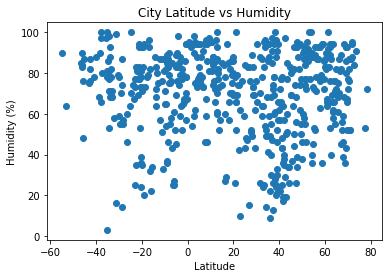

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 7/26/2020")
plt.savefig("../output_data/Fig2.png")
plt.show()
# code is comparing each individual cities latitude to the humidity for the day
# there may be limited correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

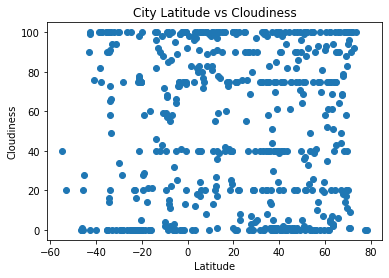

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 7/26/2020")
plt.savefig("../output_data/Fig3.png")
plt.show()
# code is comparing each individual cities latitude to the cloudiness for the day
# there does not seem to be any correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

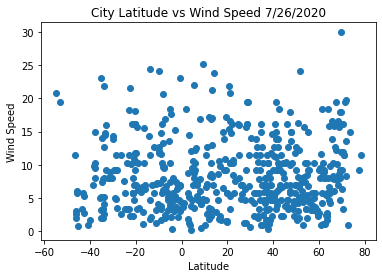

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 7/26/2020")
plt.savefig("../output_data/Fig4.png")
plt.show()
# code is comparing each individual cities latitude to the wind speed for the day
# there does not seem to be any correlation between latitude and windspeed

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression